# Astrophysics Laboratory: Data analysis - Stellar clusters
## M71 Data:

### Master bias creation

In [1]:
from helper_functions import masterBiasCreator

dir_bias   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Calibration_Images/"
dir_saves  = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Calibration_Frames/"
masterBias = masterBiasCreator(dir_bias, False, dir_saves, silent = True)

### Master flat (Red, Green, Blue) creation

In [2]:
from helper_functions import masterFlatCreator

dir_flats       = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Calibration_Images/"
dir_saves       = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Calibration_Frames/"
masterFlatRed   = masterFlatCreator(masterBias, dir_flats, False, dir_saves, "Red", silent = True) # ; print()
masterFlatGreen = masterFlatCreator(masterBias, dir_flats, False, dir_saves, "Green", silent = True) # ; print()
masterFlatBlue  = masterFlatCreator(masterBias, dir_flats, False, dir_saves, "Blue", silent = True)

### Image calibration
Data:
- For Red filter:   173 - 182: Science (60 sec. exposures);
- For Green filter: 150 - 159: Science (60 sec. exposures);
- For Blue filter:  162 - 171: Science (90 sec. exposures).

In [3]:
from helper_functions import generateCalibratedFrames

dir_lights  = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/All_Images/"
dir_saves   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Calibrated_Images/"
generateCalibratedFrames(masterBias, masterFlatRed, dir_lights, dir_saves, "Red", silent = True)# ; print()
generateCalibratedFrames(masterBias, masterFlatGreen, dir_lights, dir_saves, "Green", silent = True)# ; print()
generateCalibratedFrames(masterBias, masterFlatBlue, dir_lights, dir_saves, "Blue", silent = True)

## Appendix: Random tests
### Attempt to correct an image
Vignetting and big dust donut are gone!

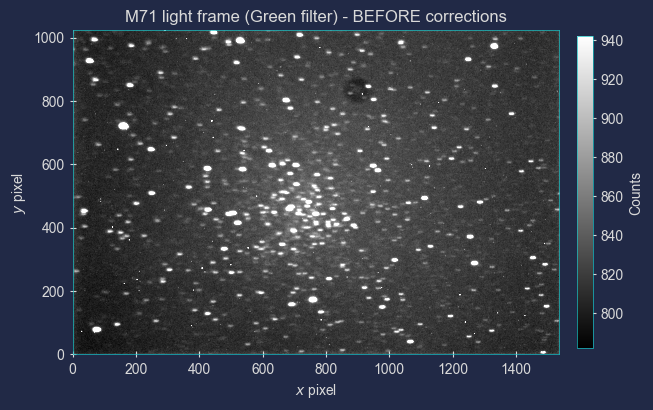

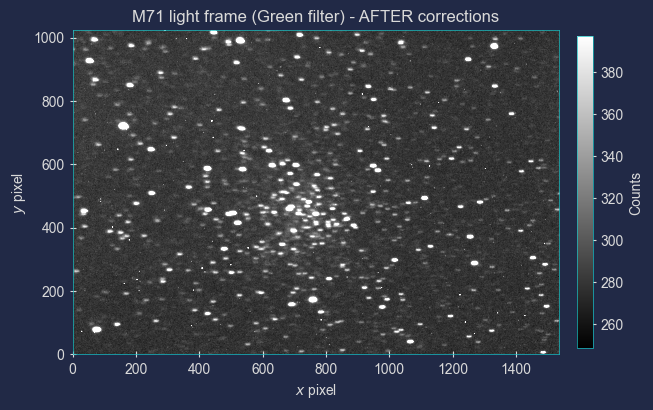

In [11]:
from helper_functions import *

# Reading a random light frame to test the code.
light_g_path = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/All_Images/M71_2023-09-19_20-37-34_Green_0150.fits"
light_g = fits.open(light_g_path)[0].data

# Before correction.
im_plot(light_g, 'M71 light frame (Green filter) - BEFORE corrections', 'Counts', True, None, 'gray', lo = 1, up = 99)

# Actual correction with bias and flat.
light_g_corrected = (light_g - masterBias)/masterFlatGreen
im_plot(light_g_corrected, 'M71 light frame (Green filter) - AFTER corrections', 'Counts', True, None, 'gray', lo = 1, up = 99)


### RGB colour composite image attempt:
This fails because the images are:
- 1: Not calibrated; (Now they are!)
- 2: Not aligned. (I think it's good now)

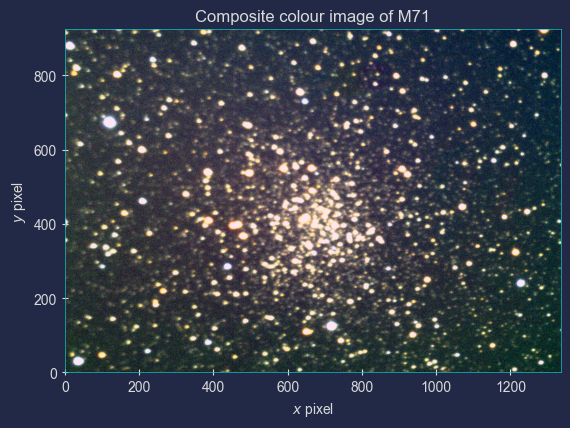

In [ ]:
from astropy.visualization import make_lupton_rgb, PowerStretch, ZScaleInterval

forCasting = np.float_()

# Read the three images. Need to interpret as 'float', otherwise 'make_lupton_rgb' complains.
r = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/Red_Stacked_aligned.fits'  )[0].data
g = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/Green_Stacked_aligned.fits')[0].data
b = fits.open('C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/Blue_Stacked_aligned.fits' )[0].data

# Crop the top and the right margin (contains black pixels, from the alignment process)
r = r[50:-50, 100:-100]
g = g[50:-50, 100:-100]
b = b[50:-50, 100:-100]

# Casting to float
r = np.array(r, forCasting)
g = np.array(g, forCasting)
b = np.array(b, forCasting)

stretch = PowerStretch(a = 1) + ZScaleInterval() # PowerStretch (a = 1) is a linear stretch.

r = stretch(r)
g = stretch(g)/1.10 # Random factors to make the image look prettier ;)
b = stretch(b)/1.05

# Plot RGB individually/separately, if you want to.
# plt.imshow(r, cmap = "Reds", origin = 'lower')
# plt.imshow(g, cmap = "Greens", origin = 'lower')
# plt.imshow(b, cmap = "Blues", origin = 'lower')

lo_val, up_val = np.percentile(np.hstack((r.flatten(), g.flatten(), b.flatten())), (0.5, 99.5))  # Get the value of lower and upper 0.5% of all pixels
stretch_val = up_val - lo_val
rgb_default = make_lupton_rgb(r, g, b, minimum = lo_val, Q = 0, stretch = stretch_val, filename = "M71-Default.jpeg")

# Cut the top rows - contains black pixels
# rgb_default = rgb_default[50:-50, 100:-100, :]

plt.imshow(rgb_default, origin = 'lower')
plt.title('Composite colour image of M71')
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.grid(False)
plt.savefig('M71_CompositeRGB.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Attempt at stacking light frames:
We try using **median** (integrated exposure: 10 mins. Except for blue: 15 mins.)

In [4]:
from helper_functions import stack_colour_frames

dir_lights  = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
dir_saves   = dir_lights

_ = stack_colour_frames(dir_lights, dir_saves, 'Red', silent = True, plot_flag = False)
_ = stack_colour_frames(dir_lights, dir_saves, 'Green', silent = True, plot_flag = False)
_ = stack_colour_frames(dir_lights, dir_saves, 'Blue', silent = True, plot_flag = False)

Unalignment is very clear here. Not anymore, since we've fixed it. I hope.

### Alignment attempt, using `astroalign`:

In [5]:
import astroalign as aa
from helper_functions import align_frames

light_dir = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Calibrated_Images/"
saves_dir = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"

align_colour_frames(light_dir, saves_dir, "Red", silent = True)
align_colour_frames(light_dir, saves_dir, "Green", silent = True)
align_colour_frames(light_dir, saves_dir, "Blue", silent = True)

Now, aligning the three master light frames (R, G, B):

In [1]:
from helper_functions import align_3_stacked

dir_lights  = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
dir_saves   = dir_lights

align_3_stacked(dir_lights, dir_saves, silent = False)

Files to align: ['Blue_Stacked.fits', 'Green_Stacked.fits', 'Red_Stacked.fits'].
No. 0 alignment done.
No. 1 alignment done.
No. 2 alignment done.


### Star finder procedure

Found 834 stars in image.


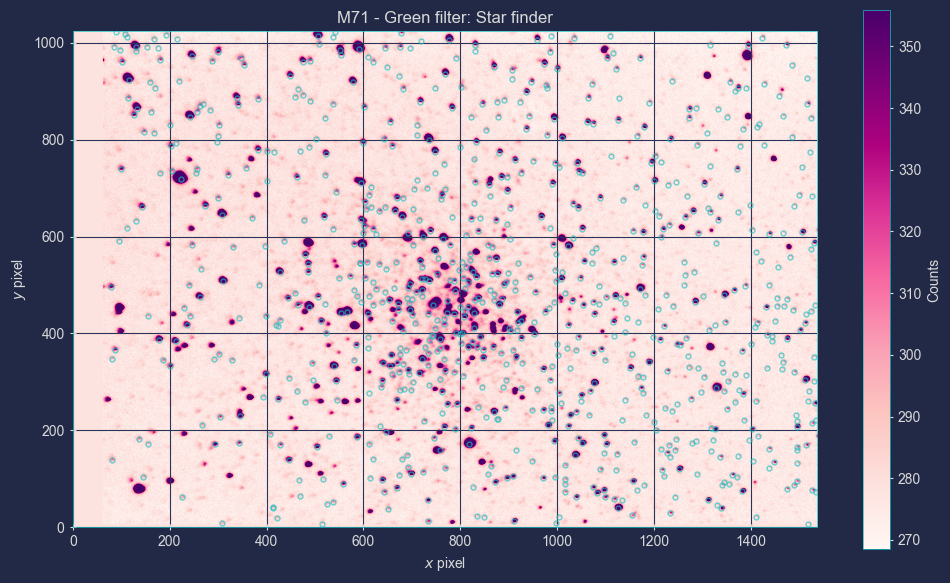

In [ ]:
# Find stars in the field
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats, gaussian_sigma_to_fwhm

dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
Green_frame = "Green_Stacked_aligned.fits"
data_g = fits.open(dir_Light + Green_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.

# Get background
mean, median, std = sigma_clipped_stats(data_g, sigma = 3.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 5.0 * std, ratio = 0.470712/1.105443)  # 'peakmax' to exclude saturated stars!  
sources = daofind(data_g - median)
print("Found %i stars in image." %len(sources))

# Plot stars found
fig = plt.figure(figsize = (12, 7))
plt.title("M71 - Green filter: Star finder")
l1 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 1.5)
l2 = np.percentile(data_g[np.isfinite(data_g)].flatten(), 98.5)
plt.imshow(data_g, clim = (l1, l2), origin = 'lower')
plt.colorbar(label = 'Counts')
plt.plot(sources["xcentroid"], sources["ycentroid"], 'o', mfc = 'none', markersize = 3.5, alpha = 0.65)
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.show()

In [ ]:
def GetFWHM_2D(data: np.ndarray, fwhm_estimate: float = 10.0, plot_flag: bool = False):
    """
    Description:
        Estimates the FWHM of stars in a given image.
    Args:
        data (np.ndarray): image to be used.
        fwhm_estimate (float): initial guess for the FWHM of the stars in the image.
        plot_flag (bool): if True, plots the brightest stars used to estimate the FWHM.
    Outputs:
        xfwhm, yfwhm, fwhm, sigxfwhm, sigyfwhm, sigfwhm, medtheta (floats): FWHM's, Theta and uncertainties.
    """
    from astropy.modeling import models, fitting

    # Get background
    _, median, std = sigma_clipped_stats(data, sigma = 3.0, maxiters = 5)

    # Find stars
    daofind = DAOStarFinder(fwhm = fwhm_estimate, threshold = 5.0 * std) 
    sources = daofind(data_g - median)

    # Take 'nbright' brightest stars
    nbright = 10
    brightest = np.argsort(sources['flux'])[::-1][0:nbright]
    brsources = sources[brightest]

    # Fit the Gaussian PSF to brightest stars
    rmax = 25
    (ny, nx)           = np.shape(data)
    fit_g              = fitting.LevMarLSQFitter()
    allxfwhm, allyfwhm = np.zeros(len(brsources)), np.zeros(len(brsources))
    allfwhm, alltheta  = np.zeros(len(brsources)), np.zeros(len(brsources))
    for i, src in enumerate(brsources):
      if int(src['ycentroid']) > rmax and int(src['ycentroid']) < ny - rmax and \
         int(src['xcentroid']) > rmax and int(src['xcentroid']) < nx - rmax:
        img = data[int(src['ycentroid']) - rmax:int(src['ycentroid']) + rmax,
                   int(src['xcentroid']) - rmax:int(src['xcentroid']) + rmax]
        subx,suby   = np.indices(img.shape) # instead of meshgrid
        p_init      = models.Gaussian2D(amplitude = np.max(img), x_mean = rmax, y_mean = rmax, x_stddev = 1.0, y_stddev = 1.0)
        fitgauss    = fit_g(p_init, subx, suby, img - np.min(img))
        allxfwhm[i] = np.abs(fitgauss.x_stddev.value)
        allyfwhm[i] = np.abs(fitgauss.y_stddev.value)
        allfwhm[i]  = 0.5 * (allxfwhm[i] + allyfwhm[i])
        alltheta[i] = fitgauss.theta.value
    xfwhm, yfwhm    = np.median(allxfwhm) * gaussian_sigma_to_fwhm,np.median(allyfwhm) * gaussian_sigma_to_fwhm
    fwhm            = np.median(allfwhm) * gaussian_sigma_to_fwhm
    sigfwhm, sigxfwhm, sigyfwhm = np.std(allfwhm), np.std(allxfwhm), np.std(allyfwhm)
    medtheta = np.median(alltheta);
    return(xfwhm, yfwhm, fwhm, sigxfwhm, sigyfwhm, sigfwhm, medtheta)

xfwhm, yfwhm, fwhm, sigxfwhm, sigyfwhm, sigfwhm, _ = GetFWHM_2D(data_g, fwhm_estimate = 10.0, plot_flag = True)

# Take 'nbright' brightest stars and print list of their fluxes
nbright = 10
brightest = np.argsort(sources['flux'])[::-1][0:nbright]
brsources = sources[brightest]
# brsources.pprint(max_width = 250) # Print 'nbright' brigthest sources

m_inst_SAO = -2.5 * np.log10(953.4556533110249)
m_inst_Man = -2.5 * np.log10(953.4556533110249/90)
# print(f"Differences: m_inst_SAO = {m_inst_SAO}, m_inst_Man = {m_inst_Man}.")

Note that `DAOStarFinder` uses a diferent formula for the instrumental magnitude than what we are supposed to use. They use:
$m_{inst} = -2.5 \log{\left(flux\right)}$, whereas we should use: $m_{inst} = -2.5 \log{\left(\frac{flux}{t_{exp}}\right)}$ ($log_{10}$, btw).

Automatization: All three filters

In [ ]:
# Find stars in the field
dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
Red_frame = "Red_Stacked_aligned.fits"
Green_frame = "Green_Stacked_aligned.fits"
Blue_frame = "Blue_Stacked_aligned.fits"

data_r = fits.open(dir_Light + Red_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.
data_g = fits.open(dir_Light + Green_frame)[0].data + 0
data_b = fits.open(dir_Light + Blue_frame)[0].data + 0

# Get background
mean, median, std = sigma_clipped_stats(data_r, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.0 * std)  # 'peakmax' to exclude saturated stars!  
sources_r = daofind(data_r - median)
print("Found %i stars in image (Red)." %len(sources_r))

# Get background
mean, median, std = sigma_clipped_stats(data_g, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.0 * std)  # 'peakmax' to exclude saturated stars!  
sources_g = daofind(data_g - median)
print("Found %i stars in image (Green)." %len(sources_g))

# Get background
mean, median, std = sigma_clipped_stats(data_b, sigma = 5.0, maxiters = 5)
# Find stars
daofind = DAOStarFinder(fwhm = 10.0, threshold = 4.0 * std)  # 'peakmax' to exclude saturated stars!  
sources_b = daofind(data_b - median)
print("Found %i stars in image (Blue)." %len(sources_b))

# Take 'nbright' brightest stars and print list of their fluxes
nbright = 5

brightest_r = np.argsort(sources_r['flux'])[::-1][0:nbright]
brightest_g = np.argsort(sources_g['flux'])[::-1][0:nbright]
brightest_b = np.argsort(sources_b['flux'])[::-1][0:nbright]

brsources_r = sources_r[brightest_r]
brsources_g = sources_g[brightest_g]
brsources_b = sources_b[brightest_b]

print("- R filter:"); brsources_r.pprint(max_width = 250); print() # Print 'nbright' brigthest sources
print("- V filter:"); brsources_g.pprint(max_width = 250); print()
print("- B filter:"); brsources_b.pprint(max_width = 250)

magR = -2.5 * np.log10(brsources_r['flux']/60) # Remember to divide by exposure time!
magG = -2.5 * np.log10(brsources_g['flux']/60) 
magB = -2.5 * np.log10(brsources_b['flux']/90)
# Now, I'm missing the calibration with the standard photometric star.

Found 1603 stars in image (Red).
Found 1464 stars in image (Green).
Found 804 stars in image (Blue).


### Point Spread Function (PSF) Photometry:
- $1^{st}$ Attempts: Starting with background corrections, using `MMMBackground`

In [ ]:
from photutils.detection import DAOStarFinder
from photutils.psf import PSFPhotometry, IterativePSFPhotometry, IntegratedGaussianPRF
from astropy.stats import SigmaClip
from photutils.background import Background2D, MMMBackground # Can also use 'MedianBackground'
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.table import QTable

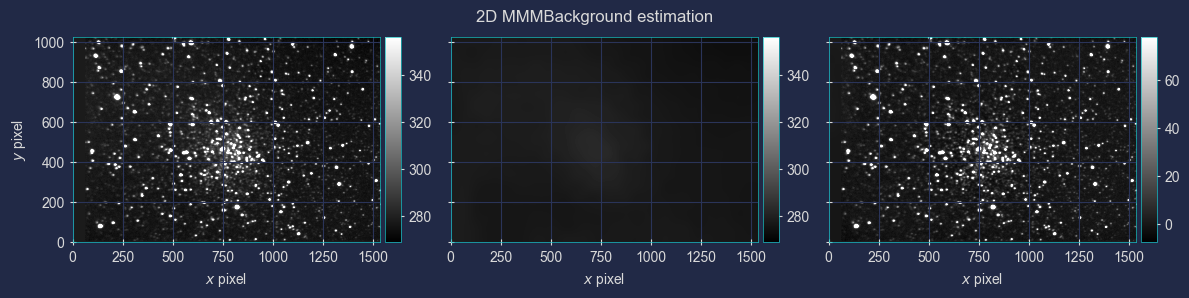

In [ ]:
# Find stars in the field
dir_Light   = "C:/Users/afons/Desktop/Universidade/Lab_Astrofisica/Python/Alignment/"
Red_frame = "Green_Stacked_aligned.fits"
data_r = fits.open(dir_Light + Red_frame)[0].data + 0  # Here, the addition of zero (0) solves the the endian compiler issue.

# Get background
sigma_clip = SigmaClip(sigma = 3.0)
bkg_estimator = MMMBackground(sigma_clip = sigma_clip)
bkg = Background2D(data_r, (50, 50), filter_size = (3, 3), sigma_clip = sigma_clip, bkg_estimator = bkg_estimator)

# Plotting results
lo, up = np.percentile(data_r, 1.5), np.percentile(data_r, 98.5)
fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)

# Axes' labels
ax[0].set_xlabel(r'$x$ pixel')
ax[1].set_xlabel(r'$x$ pixel')
ax[2].set_xlabel(r'$x$ pixel')
ax[0].set_ylabel(r'$y$ pixel')

# Actual plotting
im0 = ax[0].imshow(data_r, cmap = 'gray', origin = 'lower', clim = (lo, up))
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
fig.colorbar(im0, cax = cax, orientation = 'vertical')

im1 = ax[1].imshow(bkg.background, cmap = 'gray', origin = 'lower', clim = (lo, up))
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
fig.colorbar(im1, cax = cax, orientation = 'vertical')

lo, up = np.percentile(data_r - bkg.background, 1.5), np.percentile(data_r - bkg.background, 98.5)
im2 = ax[2].imshow(data_r - bkg.background, cmap = 'gray', origin = 'lower', clim = (lo, up))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
fig.colorbar(im2, cax = cax, orientation = 'vertical')

# Title
fig.suptitle("2D MMMBackground estimation")
fig.tight_layout()
fig.subplots_adjust(top = 1.5)
plt.show()

Found 787 stars in image (Blue).


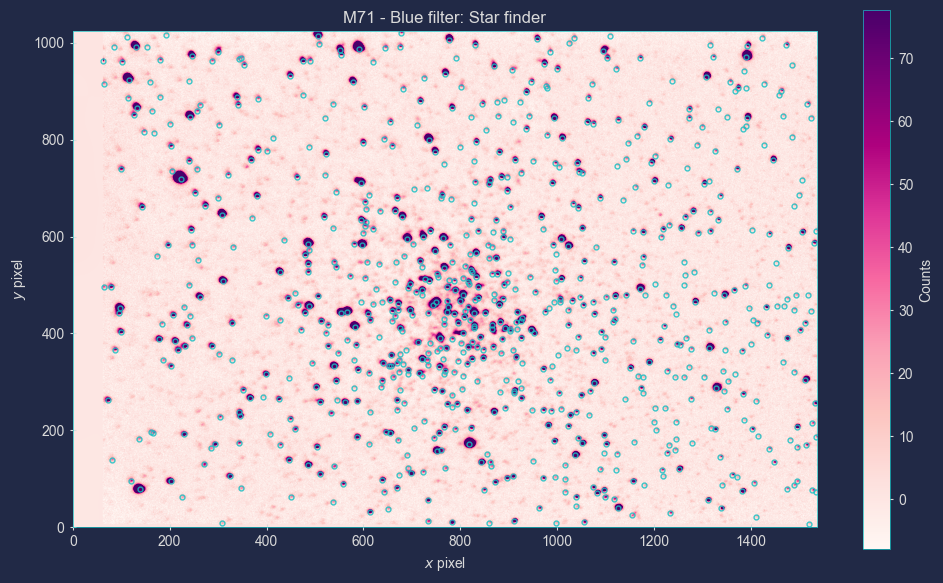

In [ ]:
# Hopefully better 'Starfinder' algorithm
data = data_r - bkg.background
FWHM = 9.0           # FWHM ~ 12 taken from ds9! (Of the 2D Gaussian kernel)
fit_shape = (3, 3)   # Fit shape of the PSF model (9x9 pixel grid)

xfwhm, yfwhm, fwhm, sigxfwhm, sigyfwhm, sigfwhm, _ = GetFWHM_2D(data, fwhm_estimate = 10.0, plot_flag = True)
psf_model = IntegratedGaussianPRF(flux = 1, sigma = fwhm / 2.355)                  # Sigma = FWHM / 2.355 (FWHM ~ 10 taken from ds9!)
daofind = DAOStarFinder(fwhm = fwhm, threshold = 10.0 * bkg.background_rms_median) # If we assume bkg_rms = std, then threshold = 3.0 * std.
psfphot = PSFPhotometry(psf_model, fit_shape, finder = daofind,                    # This also assumes <bkg> = 0 (Average = 0).
                        aperture_radius = 4.0)
phot = psfphot(data)
print(f'Found {len(phot)} stars in image (Blue).')

# Plot stars found
fig = plt.figure(figsize = (12, 7))
plt.title("M71 - Blue filter: Star finder")
l1 = np.percentile(data[np.isfinite(data)].flatten(), 1.5)
l2 = np.percentile(data[np.isfinite(data)].flatten(), 98.5)
plt.imshow(data, clim = (l1, l2), origin = 'lower')
plt.colorbar(label = 'Counts')
plt.plot(phot["x_init"], phot["y_init"], 'o', mfc = 'none', markersize = 3.5, alpha = 0.85) # The fits are exploding, for some reason.
plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.grid(False)
plt.show()

# Take 'nbright' brightest stars and print list of their fluxes
nbright = 20
brightest = np.argsort(phot['flux_fit'])[::-1][0:nbright]
brsources = phot[brightest]
# brsources.pprint(max_width = 350) # Print 'nbright' brigthest sources
pos = (brsources['x_init'], brsources['y_init'])

init_params = QTable()
init_params['x'] = pos[0]
init_params['y'] = pos[1]

Found 2833 stars in image (Blue).


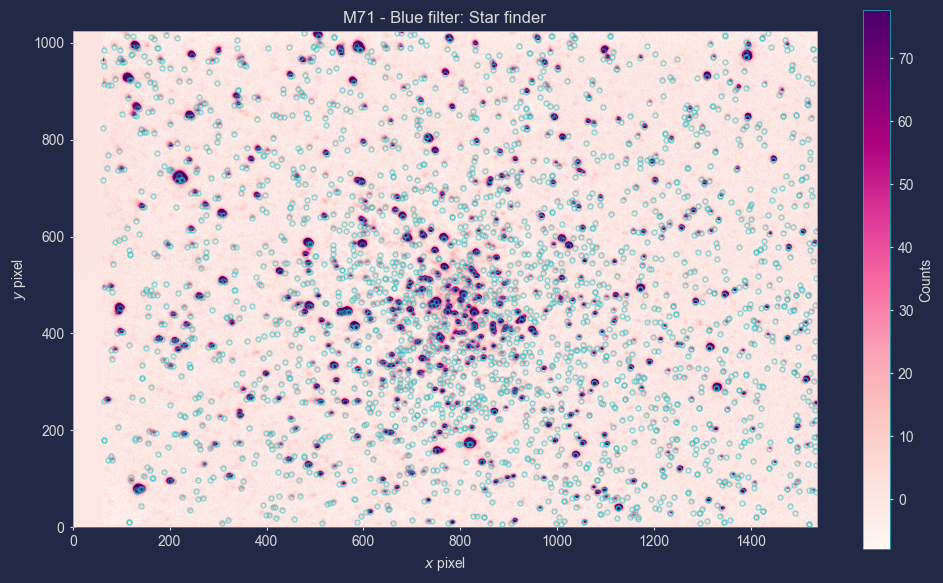

In [ ]:
# Hopefully better 'Starfinder' algorithm
fit_shape = (15, 15) # Fit shape of the PSF model (9x9 pixel grid)
psf_model = IntegratedGaussianPRF(flux = 1, sigma = fwhm / 2.355) # Sigma = FWHM / 2.355 (FWHM ~ 10 taken from ds9!)
daofind = DAOStarFinder(fwhm = FWHM, threshold = 4.0 * std) # If we assume bkg_rms = std, then threshold = 3.0 * std.
psfphot = IterativePSFPhotometry(psf_model, fit_shape, finder = daofind,           # This also assumes <bkg> = 0 (Average = 0).
                                 aperture_radius = 4.0)
data = data_r - bkg.background
phot = psfphot(data, init_params = init_params)
print(f'Found {len(phot)} stars in image (Blue).')

# Plot stars found
fig = plt.figure(figsize = (12, 7))
plt.title("M71 - Blue filter: Star finder")
l1 = np.percentile(data[np.isfinite(data)].flatten(), 1.5)
l2 = np.percentile(data[np.isfinite(data)].flatten(), 98.5)
plt.imshow(data, clim = (l1, l2), origin = 'lower')
plt.colorbar(label = 'Counts')
plt.plot(phot["x_init"], phot["y_init"], 'o', mfc = 'none', markersize = 3.5, alpha = 0.5) # The fits are exploding, for some reason.

plt.xlabel(r'$x$ pixel')
plt.ylabel(r'$y$ pixel')
plt.grid(False)
plt.show()

# To do/check:
# - psfphot's "error": what is this?
# - Iterative PSF photometry: https://photutils.readthedocs.io/en/stable/psf.html#iterative-psf-photometry
# - Also, ask the professor the questions that I wrote in my notebook.

In [ ]:
from astropy.table import QTable, Table

def get_x_fit(Table):
        return Table['x_fit']
Table(rows = sorted(phot, key = get_x_fit)[:], names = phot.colnames)

<Table length=1611>
  id  group_id iter_detected ...           cfit          flags
int32  int32       int32     ...         float64         int32
----- -------- ------------- ... ----------------------- -----
  916      916             2 ... -0.00037861343959713287     0
 1557     1557             3 ...     -0.0020867752501035     0
  547      547             2 ...  0.00029235033131544186     0
  887      887             2 ...  -0.0006363715439879739     0
 1561     1561             3 ...   -0.002626493466068504     0
 1080     1080             3 ...   0.0001085937714889718     0
 1082     1082             3 ... -7.0925847877122815e-06     8
  230      230             2 ...  0.00043620816536842983     0
 1310     1310             3 ...   -0.000569389223206066     0
  548      548             2 ...  -0.0002609229110719617     0
  ...      ...           ... ...                     ...   ...
 1148     1148             3 ...  -0.0022171332615002043     0
  649      649             2 ...   0.0008830052806841588     0
  268      268             2 ...    0.006231609373814019     0
  337      337             2 ...    0.002723116403349889     0
  922      922             2 ...   -0.001888103419097199     0
  222      222             2 ...    0.001266956744744881     0
  672      672             2 ...  0.00021398675383030213     2
 1405     1405             3 ...  0.00021398675383030213     2
  159      159             2 ...   0.0001164413937470209     2
 1039     1039             3 ...   0.0001164413937470209     2

Extra 1 - Masking by flags:

In [ ]:
#  Create a mask to exclude flagged sources
mask = phot['flags'] == 0
phot = phot[mask]

mags = sorted(-2.5 * np.log10(phot['flux_fit']/90))
mags
sorted(phot['qfit'])

Extra 2 - Visualizing results:

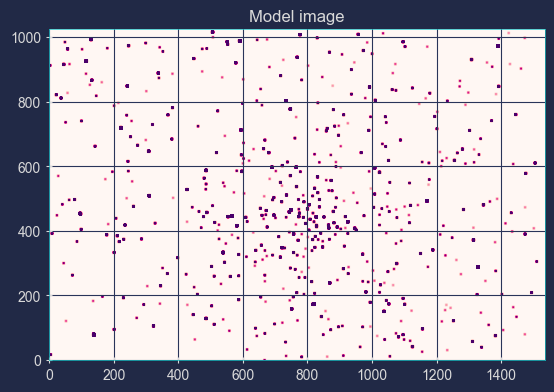

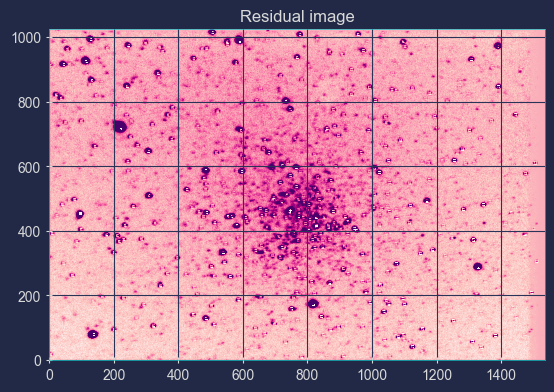

In [ ]:
# Make model image:
im = psfphot.make_model_image(data_r.shape, fit_shape)
l1 = np.percentile(im[np.isfinite(im)].flatten(), 1.5)
l2 = np.percentile(im[np.isfinite(im)].flatten(), 98.5)
plt.imshow(im, clim = (l1, l2), origin = 'lower')
plt.title('Model image')
plt.show()

# Make residual image:
im = psfphot.make_residual_image(data_r, fit_shape)
l1 = np.percentile(im[np.isfinite(im)].flatten(), 1.5)
l2 = np.percentile(im[np.isfinite(im)].flatten(), 98.5)
plt.imshow(im, clim = (l1, l2), origin = 'lower')
plt.title('Residual image')
plt.show()

Calibration is good in this notebook. Starfinder algorithm is in the other one: `LabAst_M71_Cleanup.ipynb`.